<a href="https://colab.research.google.com/github/oeberle/BiLRP_explain_similarity/blob/master/BiLRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/oeberle/BiLRP_explain_similarity.git

Cloning into 'BiLRP_explain_similarity'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 26 (delta 4), reused 17 (delta 1), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [4]:
cd BiLRP_explain_similarity

/content/BiLRP_explain_similarity


In [5]:
import numpy as np
from model.bilrp import VggLayers, vgg_gamma
from utils import load_image, proc_image
from visualization.plotting import plot_relevances, clip, get_alpha

In [ ]:
# Loading image pairs
file1, file2 = 'data/0.jpg', 'data/1.jpg'
img1, img2 = load_image(file1), load_image(file2)

# Loading BiLRP-VGG-16 similarity model using feature from layer 31
feature_layer = '31' 
h,w = img1.shape[:2]
model = VggLayers(feature_layer=feature_layer, h=h,  w= w, embedding_size = 100, proj_case='random', seed=5)
#model.cuda()
model.eval()


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
poolsize = [8]
X1, X2 = proc_image(file1), proc_image(file2)
print(X1.shape, X2.shape)
R = model.bilrp(X1.cuda(),X2.cuda(), poolsize=poolsize, gamma_func=vgg_gamma)

torch.Size([1, 3, 128, 128]) torch.Size([1, 3, 128, 128])


torch.Size([1, 3, 128, 128]) torch.Size([1, 3, 128, 128])


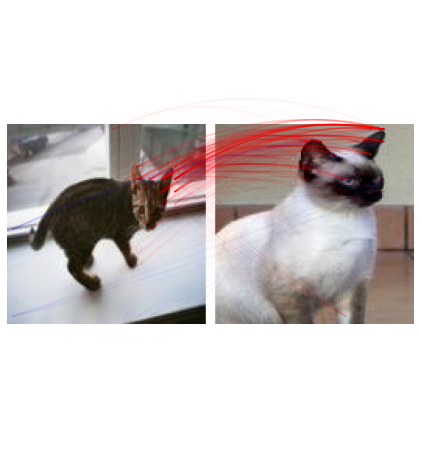

In [20]:
poolsize = [8]
X1, X2 = proc_image(file1), proc_image(file2)
print(X1.shape, X2.shape)
R = model.bilrp(X1.cuda(),X2.cuda(), poolsize=poolsize, gamma_func=vgg_gamma)

fname = None
clip_func = lambda x: get_alpha(clip(x,clim1=[-0.25,0.25], clim2= [-13,13]), p=2)

indices = np.indices(R.shape)
inds_all = [(i, R[i[0], i[1], i[2], i[3]]) for i in indices.reshape((4, np.prod(indices.shape[1:]))).T]  

plot_relevances(inds_all,img1, img2 ,clip_func, poolsize, fname=fname, curvefac=1.7)


In [135]:
import os
from IPython.display import Image

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

fdir = '/content/BiLRP_explain_similarity/data/'


img_file1 = ''

def select_image1(ref_image):
    global img_file1
    img_file1 = ref_image
    display(Image(fdir+img_file1))
    return ref_image

interact(select_image1, ref_image=os.listdir(fdir))


@interact
def show_images2(file=os.listdir(fdir)):
  #  print(fdir+file)
    file1 = fdir+img_file1
    file2=fdir+file
    #return img2
    display(Image(file2))

    img1, img2 = load_image(file1), load_image(file2)

    poolsize = [8]
    X1, X2 = proc_image(file1), proc_image(file2)
  #  print(X1.shape, X2.shape)
    R = model.bilrp(X1.cuda(),X2.cuda(), poolsize=poolsize, gamma_func=vgg_gamma)

    fname = None
    clip_func = lambda x: get_alpha(clip(x,clim1=[-0.25,0.25], clim2= [-13,13]), p=2)

    indices = np.indices(R.shape)
    inds_all = [(i, R[i[0], i[1], i[2], i[3]]) for i in indices.reshape((4, np.prod(indices.shape[1:]))).T]  
    plot_relevances(inds_all,img1, img2 ,clip_func, poolsize, fname=fname, curvefac=1.7)

#report_output = widgets.Output()
#display(report_output)

interactive(children=(Dropdown(description='ref_image', options=('0.jpg', '1.jpg'), value='0.jpg'), Output()),…

interactive(children=(Dropdown(description='file', options=('0.jpg', '1.jpg'), value='0.jpg'), Output()), _dom…

In [137]:
model.

128

In [91]:
import ipywidgets as widgets
from IPython.display import display






a = widgets.IntSlider(value=5, min=0, max=10)

def f1(a):
    display(a)
    
def f2(a):
    display(a * 2)
    
out1 = widgets.interactive_output(f1, {'a': a})
out2 = widgets.interactive_output(f2, {'a': a})

display(a)
display(out1)
display(out2)

IntSlider(value=5, max=10)

Output()

Output()

In [73]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets

myvar = ''

def f(Books):
    global myvar
    myvar = Books
    return Books

K = interact(f, Books=['a','b','c','d']);

interactive(children=(Dropdown(description='Books', options=('a', 'b', 'c', 'd'), value='a'), Output()), _dom_…

In [75]:
f.get_interact_value()

AttributeError: ignored

In [64]:
import ipywidgets as widgets
from IPython.display import display

geo={'USA':['CHI','NYC'],'Russia':['MOW','LED']}
geoWs = {key: widgets.Select(options=geo[key]) for key in geo}

def get_current_state():
    return {'country': i.children[0].value,
            'city': i.children[1].value}

def print_city(**func_kwargs):
    print('func_kwargs', func_kwargs)
    print('i.kwargs', i.kwargs)
    print('get_current_state', get_current_state())

def select_country(country):
    new_i = widgets.interactive(print_city, country=countryW, city=geoWs[country['new']])
    i.children = new_i.children

countryW = widgets.Select(options=list(geo.keys()))
init = countryW.value
cityW = geoWs[init]

countryW.observe(select_country, 'value')

i = widgets.interactive(print_city, country=countryW, city=cityW)

display(i)

interactive(children=(Select(description='country', options=('USA', 'Russia'), value='USA'), Select(descriptio…

In [66]:
display(i)

interactive(children=(Select(description='country', index=1, options=('USA', 'Russia'), value='Russia'), Selec…

In [67]:
caption = widgets.Label(value='The values of range1 and range2 are synchronized')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)


Label(value='The values of range1 and range2 are synchronized')

IntSlider(value=1, description='Slider', max=5, min=-5)

In [72]:
slider.get_interact_value()

0

In [90]:
image1 = widgets.Image()

@interact
def image1_(file=os.listdir(fdir)):
    print(fdir+file)
    img1 = fdir+file
    return  display(Image(img1))

interactive(children=(Dropdown(description='file', options=('0.jpg', '1.jpg'), value='0.jpg'), Output()), _dom…

In [84]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from PIL import Image
img = Image.open('/content/BiLRP_explain_similarity/data/1.jpg').convert('L')

@interact
def binarize(th: (0, 255, 1)):
    return img.point(lambda p: 255 if p > th else 0)

interactive(children=(IntSlider(value=127, description='th', max=255), Output()), _dom_classes=('widget-intera…

In [100]:
from IPython.display import display
ipw = widgets
output = ipw.Output()

@output.capture()
def f(x):
    print(x**2)
    return x**2

a=ipw.IntSlider(min=-10,max=20,step=1,value=10)
b=ipw.IntText(min=-10,max=20,step=1,value=10)

ipw.jslink((a,'value'),(b,'value'))

wid=ipw.interactive(f, x=a)
display(wid,b)
display(output)

interactive(children=(IntSlider(value=10, description='x', max=20, min=-10), Output()), _dom_classes=('widget-…

IntText(value=10)

Output()

In [103]:
i1 = widgets.Image(file=os.listdir(fdir))
i2 = widgets.Image(file=os.listdir(fdir))


Image(i1)

/usr/local/lib/python3.7/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'ipywidgets.widgets.widget_media.Image'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='image_files', options=('0.jpg', '1.jpg'), value='0.jpg'), Output()…

interactive(children=(Dropdown(description='image_files', options=('0.jpg', '1.jpg'), value='0.jpg'), Output()…

A /content/BiLRP_explain_similarity/data/0.jpg /content/BiLRP_explain_similarity/data/0.jpg


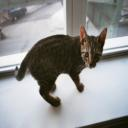

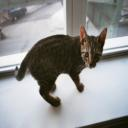

torch.Size([1, 3, 128, 128]) torch.Size([1, 3, 128, 128])


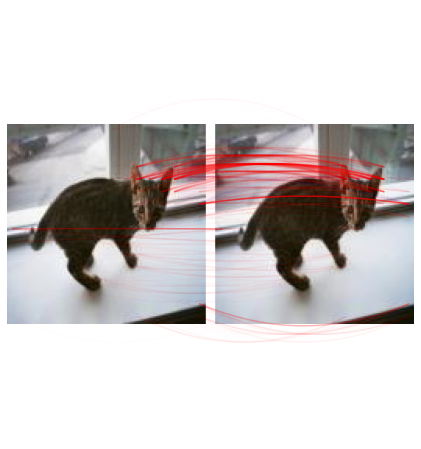

0.jpg


In [120]:


img_file1 = ''
img_file2 = ''

def select_image1(image_files):
    global img_file1
    img_file1 = image_files
    return image_files

def select_image2(image_files):
    global img_file2
    img_file2 = image_files
    return image_files


def proc():

  interact(select_image1, image_files=os.listdir(fdir))
  interact(select_image2, image_files=os.listdir(fdir))

  file1 = fdir+img_file1
  file2= fdir+img_file2
  #return img2

  print('A', file1, file2)
  display(Image(file1))
  display(Image(file2))

  img1, img2 = load_image(file1), load_image(file2)

  poolsize = [8]
  X1, X2 = proc_image(file1), proc_image(file2)
  print(X1.shape, X2.shape)
  R = model.bilrp(X1.cuda(),X2.cuda(), poolsize=poolsize, gamma_func=vgg_gamma)

  fname = None
  clip_func = lambda x: get_alpha(clip(x,clim1=[-0.25,0.25], clim2= [-13,13]), p=2)

  indices = np.indices(R.shape)
  inds_all = [(i, R[i[0], i[1], i[2], i[3]]) for i in indices.reshape((4, np.prod(indices.shape[1:]))).T]  

  plot_relevances(inds_all,img1, img2 ,clip_func, poolsize, fname=fname, curvefac=1.7)


proc()


print(myvar)

In [2]:

import os
from IPython.display import Image

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

fdir = '/content/BiLRP_explain_similarity/data/'


img_file1 = ''

def select_image1(image_files):
    global img_file1
    img_file1 = image_files
    return image_files


@interact
def show_images2(file=os.listdir(fdir)):
    print(fdir+file)

    interact(select_image1, image_files=os.listdir(fdir))

    file1 = fdir+ img_file1
    file2= fdir+file
    #return img2
  #  print(file1,file2)
    display(Image(file1))

    img1, img2 = load_image(file1), load_image(file2)

    poolsize = [8]
    X1, X2 = proc_image(file1), proc_image(file2)
    print(X1.shape, X2.shape)
    R = model.bilrp(X1.cuda(),X2.cuda(), poolsize=poolsize, gamma_func=vgg_gamma)

    fname = None
    clip_func = lambda x: get_alpha(clip(x,clim1=[-0.25,0.25], clim2= [-13,13]), p=2)

    indices = np.indices(R.shape)
    inds_all = [(i, R[i[0], i[1], i[2], i[3]]) for i in indices.reshape((4, np.prod(indices.shape[1:]))).T]  

    plot_relevances(inds_all,img1, img2 ,clip_func, poolsize, fname=fname, curvefac=1.7)


report_output = widgets.Output()
display(report_output)

FileNotFoundError: ignored